# Proyek Analisis Data: [Bike sharing dataset]
- **Nama:** [Wahyu]
- **Email:** [wahyu160804@gmail.com]
- **ID Dicoding:** [Wahyu Dwi Prakoso]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda setiap hari dan jamnya?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- Memuat tabel day
- Memuat tabel hour

### Assessing Data

#### Menilai Data `day_df`

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print(day_df.duplicated().sum(), day_df.isnull().sum())

0 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
print(hour_df.duplicated().sum(), hour_df.isnull().sum())

0 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menampilkan informasi dasar dari setiap dataframe
- Melihat beberapa baris pertama dari setiap dataframe
- Mengecek nilai duplikat dan nilai kosong
- Mengecek statistik dasar untuk outlier

### Cleaning Data

#### Membersihkan Tabel `day_df`

##### Duplicate Data

In [11]:
day_df.duplicated().sum()

0

In [12]:
day_df.drop_duplicates(inplace=True)

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengubah Tipe Data

In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#### Membersihkan Tabel `hour_df`

##### Duplicate Data

In [15]:
hour_df.duplicated().sum()

0

In [16]:
hour_df.drop_duplicates(inplace=True)

In [17]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
hour_df.duplicated(subset=['dteday', 'hr']).sum()

0

##### Mengubah Tipe Data

In [19]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Menghilangkan duplicate pada data day_df
- Menghilangkan duplicate pada data hour_df
- Mengubah tipe data dteday menjadi datetime
- Memastikan dataset sudah bersih

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [20]:
day_df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [21]:
day_df['yr'].value_counts()

yr
1    366
0    365
Name: count, dtype: int64

In [22]:
day_df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [23]:
day_df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [24]:
numeric_df = day_df.select_dtypes(include=['number'])  
corr_matrix = numeric_df.corr()  
print(corr_matrix)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

In [25]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [26]:
day_df['date_numeric'] = (day_df['dteday'] - day_df['dteday'].min()) / pd.Timedelta(days=1)

In [27]:
day_df_cleaned = day_df.drop(columns=['dteday', 'holiday', 'weekday'])  
corr_matrix = day_df_cleaned.corr()  
print(corr_matrix)

               instant    season        yr      mnth  workingday  weathersit  \
instant       1.000000  0.412224  0.866025  0.496702   -0.004337   -0.021477   
season        0.412224  1.000000 -0.001844  0.831440    0.012485    0.019211   
yr            0.866025 -0.001844  1.000000 -0.001792   -0.002013   -0.048727   
mnth          0.496702  0.831440 -0.001792  1.000000   -0.005901    0.043528   
workingday   -0.004337  0.012485 -0.002013 -0.005901    1.000000    0.061200   
weathersit   -0.021477  0.019211 -0.048727  0.043528    0.061200    1.000000   
temp          0.150580  0.334315  0.047604  0.220205    0.052660   -0.120602   
atemp         0.152638  0.342876  0.046106  0.227459    0.052182   -0.121583   
hum           0.016375  0.205445 -0.110651  0.222204    0.024327    0.591045   
windspeed    -0.112620 -0.229046 -0.011817 -0.207502   -0.018796    0.039511   
casual        0.275255  0.210399  0.248546  0.123006   -0.518044   -0.247353   
registered    0.659623  0.411623  0.5942

**Insight:**
- Mengecek distribusi kategori season
- Mengecek distribusi kategori tahun (yr)
- Mengecek distribusi kategori hari libur (holiday)
- Mengecek distribusi hari dalam seminggu (weekday)
- Memisahkan kolom numerik dan non-numerik
- Mengoversi kolom tanggal ke format numerik
- Melihat kolom non-numerik dan menghapusnya

### Explore `hour_df`

In [28]:
hour_df['hr'].value_counts().sort_index()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

In [29]:
hour_df['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [30]:
numeric_hour_df = hour_df.select_dtypes(include=['number'])  
corr_matrix = numeric_hour_df.corr()  
print(corr_matrix)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [31]:
hour_df_cleaned = hour_df.drop(columns=['dteday', 'weathersit'])  
corr_matrix = hour_df_cleaned.corr()  
print(corr_matrix)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.008740 -0.135386  0.137252  0.003988   
casual      0.158295  0.120206  0.1427

In [32]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday']) 

In [33]:
hour_df['dteday_numeric'] = (hour_df['dteday'] - hour_df['dteday'].min()) / pd.Timedelta(days=1)  

**Insight:**
- Mengecek distribusi jumlah penggunaan sepeda berdasarkan jam
- Mengecek distribusi penggunaan sepeda berdasarkan kondisi cuaca
- Memsidahkan kolom numerik dan non-numerik
- Menghapus kolom dteday dan weathersit
- Mengonversi dteday menjadi numerik

### Explore all data

In [34]:
all_data = pd.merge(hour_df, day_df, on='dteday', how='left')

all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Bagaimana tren penggunaan sepeda setiap hari dan jamnya?:

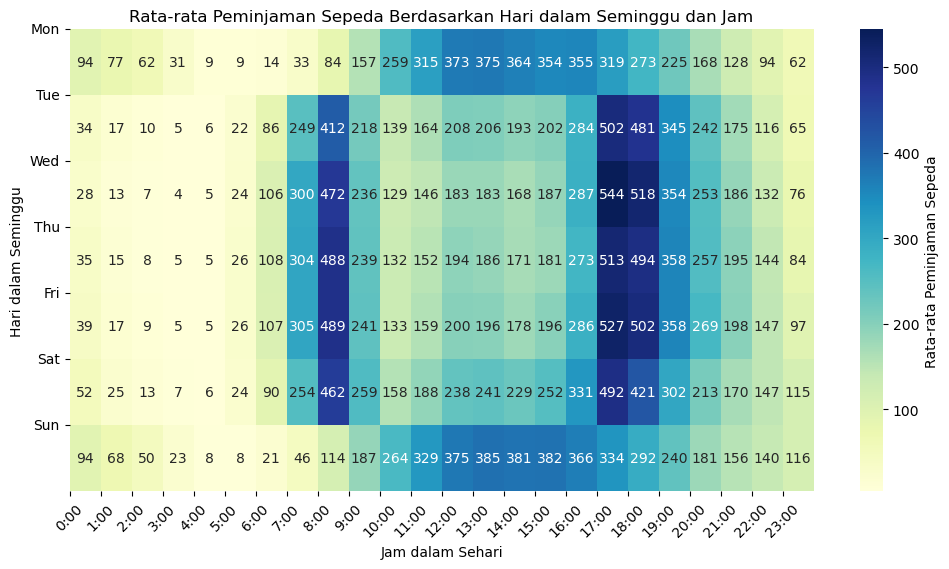

In [35]:
pivot_data = hour_df.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Rata-rata Peminjaman Sepeda'})
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu dan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Seminggu')
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

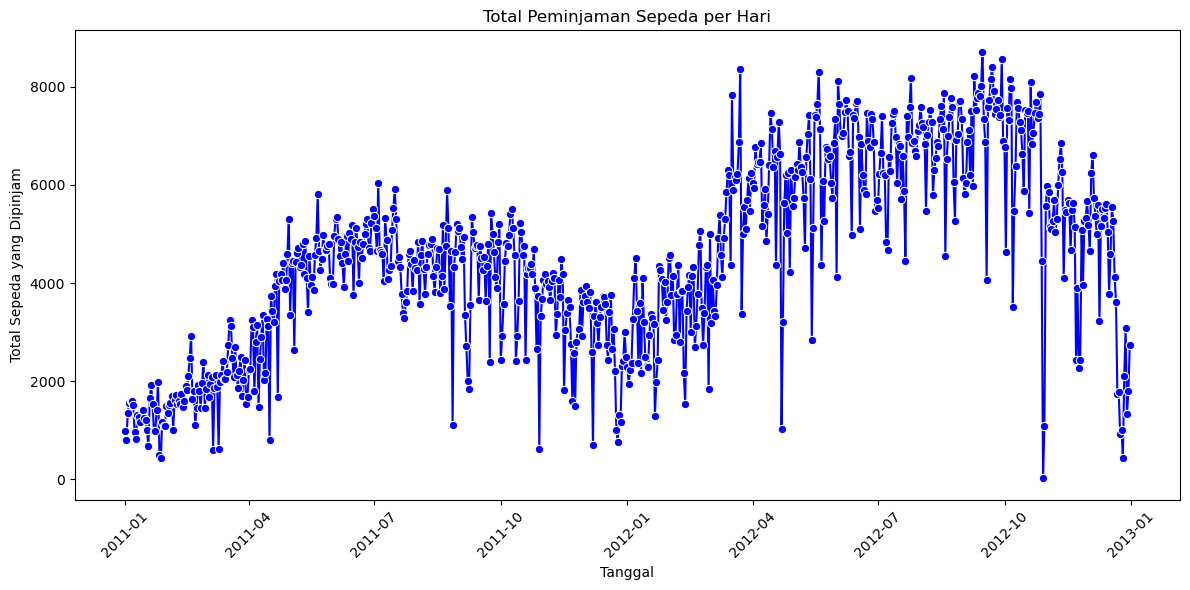

In [36]:
daily_data = hour_df.groupby('dteday')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='dteday', y='cnt', marker='o', color='b')
plt.title('Total Peminjaman Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Sepeda yang Dipinjam')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?:

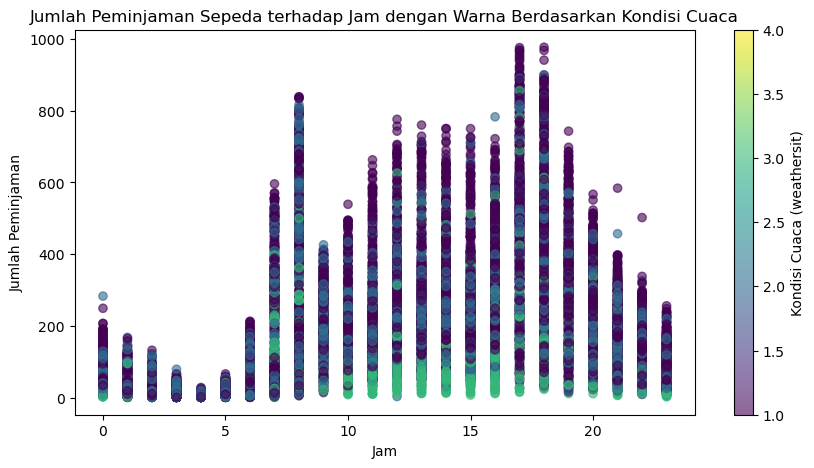

In [ ]:
plt.figure(figsize=(10, 5))
sc = plt.scatter(hour_df['hr'], hour_df['cnt'], c=hour_df['weathersit'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label="Kondisi Cuaca (weathersit)")
plt.title("Jumlah Peminjaman Sepeda terhadap Jam dengan Warna Berdasarkan Kondisi Cuaca")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Visualisasi heatmap untuk melihat pola peminjaman berdasarkan hari dan jam
- Visualisasi line plot untuk melihat total peminjaman sepeda per hari
- Visualisasi scatter plot untuk melihat jumlah peminjaman terhadap jam, dengan warna berdasarkan kondisi cuaca

## Analisis Lanjutan (Clustering)

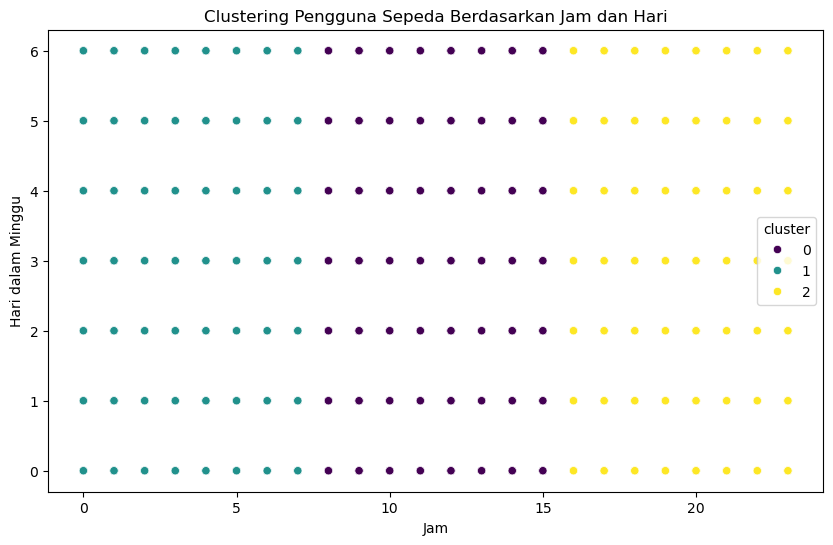

In [38]:
X = hour_df[['hr', 'weekday']]  

kmeans = KMeans(n_clusters=3)
hour_df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='hr', y='weekday', hue='cluster', palette='viridis')
plt.title('Clustering Pengguna Sepeda Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Hari dalam Minggu')
plt.show()

## Conclusion

- Peminjaman sepeda paling banyak terjadi pada sore hari antara pukul 17:00 hingga 19:00 di sepanjang minggu, terutama pada hari kerja seperti Rabu, Kamis, dan Jumat.
- Pada akhir pekan (Sabtu dan Minggu), peminjaman juga cukup tinggi di sore hari, meskipun sedikit lebih merata sepanjang hari dibandingkan dengan hari kerja.
- Di pagi hari, terdapat peningkatan peminjaman sekitar pukul 8:00, yang mungkin mencerminkan penggunaan sepeda untuk perjalanan ke tempat kerja atau sekolah.
- Peminjaman sepeda cenderung meningkat seiring dengan kenaikan suhu. Pada temperatur yang lebih tinggi, lebih banyak peminjaman sepeda tercatat.
- Kelembapan mempengaruhi intensitas peminjaman sepeda, di mana peminjaman cenderung lebih tinggi pada kelembapan sedang hingga rendah. Pada kelembapan yang sangat tinggi atau sangat rendah, jumlah peminjaman sedikit menurun.
- Terdapat tiga kelompok utama (cluster) pengguna sepeda berdasarkan jam dan hari. Hal ini menunjukkan pola penggunaan sepeda yang berbeda-beda di sepanjang minggu dan jam dalam sehari.
- Cluster ini mungkin menunjukkan karakteristik penggunaan sepeda yang berbeda, misalnya, cluster pengguna pagi hari, sore hari, dan pengguna akhir pekan atau hari kerja tertentu.